# **SQL and Simple Linear Regression**

## **Part 1: SQL**

## Task 1

Wite a SQL  query to list all tables in the Chinook SQLite sample database.

Database diagram and more information on the database can be found [here](https://www.sqlitetutorial.net/sqlite-sample-database/).

In [1]:
import sqlite3

# Connect to SQLite database
connection = sqlite3.connect('chinook.db')

# Create cursor to execute SQL commands
cursor = connection.cursor()

# Execute SQL query using cursor
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all results and print
print(list(field[0] for field in cursor.fetchall()))

# Close cursor and atabase connection
cursor.close()
connection.close()

['albums', 'sqlite_sequence', 'artists', 'customers', 'employees', 'genres', 'invoices', 'invoice_items', 'media_types', 'playlists', 'playlist_track', 'tracks', 'sqlite_stat1']


## Task 2

Select all artists whose name starts wih "A" and ends with "e".

In [2]:
# Connect to SQLite database
connection = sqlite3.connect('chinook.db')

# Create cursor to execute SQL commands
cursor = connection.cursor()

# Execute SQL query using cursor
cursor.execute("SELECT * FROM artists WHERE name LIKE 'A%e';")

# Fetch all results and print
print(list(field[1] for field in cursor.fetchall()))

# Close cursor and database connection
cursor.close()
connection.close()

['Alanis Morissette', 'Audioslave', 'Avril Lavigne', 'Amy Winehouse']


## Task 3

Use the track table to generate a plot that shows the average Milliseconds for each genre.

The name of the genre must be used as x labels of the resulting plot.

Use `plt.xticks(rotation=90)` to rotate the x axis labels.

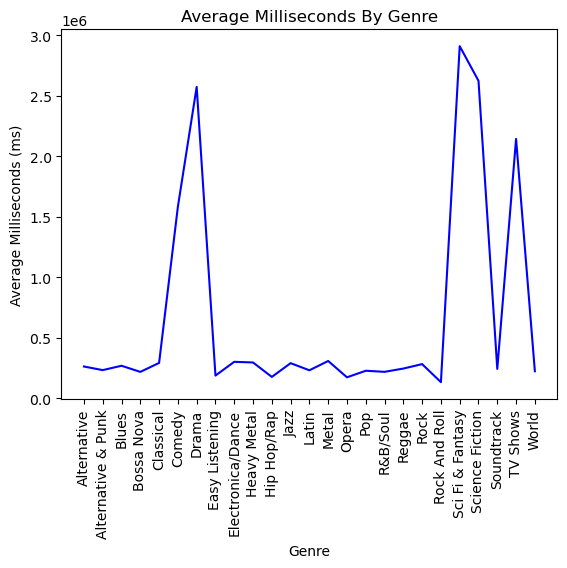

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
connection = sqlite3.connect('chinook.db')

# Use pandas to execute SQL query and fetch the data directly into a DataFrame
playlist_df = pd.read_sql_query("""
SELECT genres.Name, AVG(tracks.Milliseconds) as AverageMS
FROM tracks
INNER JOIN genres ON tracks.GenreId = genres.GenreId
GROUP BY genres.Name
""", connection)

# Close the database connection
connection.close()

# Create a line plot from the DataFrame
plt.plot(playlist_df['Name'], playlist_df['AverageMS'], color='blue')
plt.title('Average Milliseconds By Genre')
plt.xlabel('Genre')
plt.ylabel('Average Milliseconds (ms)')
plt.xticks(rotation=90) # Rotate x-axis labels

# Visualize plot
plt.show()


## Task 4

List the total number of tracks for each playlist. The Playlist name should also be shown.

In [4]:
# Connect to SQLite database
connection = sqlite3.connect('chinook.db')

# Create a cursor object using the cursor() method
cursor = connection.cursor()

# Use pandas to execute query and store in DataFrame
playlist_df = pd.read_sql_query("""
SELECT playlists.Name AS PLAYLIST, COUNT(playlist_track.TrackId) AS TOTALTRACKS
FROM playlists
INNER JOIN playlist_track ON playlists.PlaylistId = playlist_track.PlaylistId
GROUP BY playlists.Name
""", connection)

# Display DataFrame
print(playlist_df)

# Close cursor and database connection
cursor.close()
connection.close()

                      PLAYLIST  TOTALTRACKS
0                   90’s Music         1477
1              Brazilian Music           39
2                    Classical           75
3    Classical 101 - Deep Cuts           25
4   Classical 101 - Next Steps           25
5   Classical 101 - The Basics           25
6                       Grunge           15
7          Heavy Metal Classic           26
8                        Music         6580
9                 Music Videos            1
10                 On-The-Go 1            1
11                    TV Shows          426


## **Part 2: Linear Regression**

## Task 1

Create an average graph for the [ocean dataset](https://www.kaggle.com/datasets/sohier/calcofi) to show the relationship between water salinity (Salnty) & water temperature (T_degC)

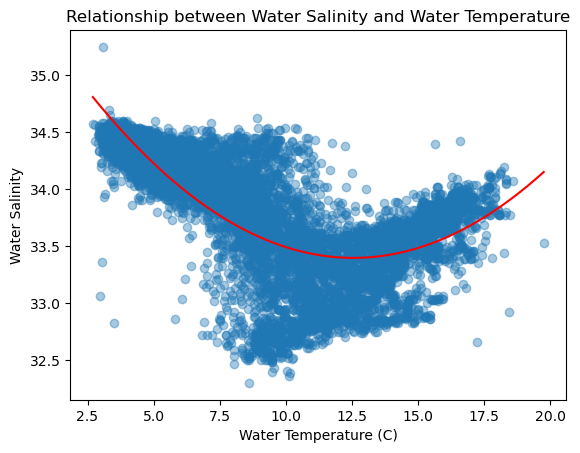

In [5]:
import numpy as np

# Load dataset
ocean_df = pd.read_csv('ocean.csv', low_memory=False)

# Clean data by dropping rows with missing values for columns
ocean_df = ocean_df[["Salnty", "T_degC"]].iloc[:10000, :].astype(float)
ocean_df = ocean_df.dropna(subset=['Salnty', 'T_degC'])

# Fit model by using water temperatures as features and salinity as target
X = ocean_df['T_degC'].values
y = ocean_df['Salnty'].values

# Calculate coefficients and create polynomial function
coeff = np.polyfit(X, y, 2)
poly = np.poly1d(coeff)

# Compute y-values for average line
X_line = np.linspace(np.min(X), np.max(X), num=len(X))
y_avg = poly(X_line)

# Create scatter plot
plt.scatter(X, y, alpha=0.4)

# Compute and plot average line
plt.plot(X_line, y_avg, color='red')

# Title plot and add axis labels
plt.title('Relationship between Water Salinity and Water Temperature')
plt.xlabel('Water Temperature (C)')
plt.ylabel('Water Salinity')

# Display plot
plt.show()

## Task 2

Create a linear regression line and compare it with the average line created above.

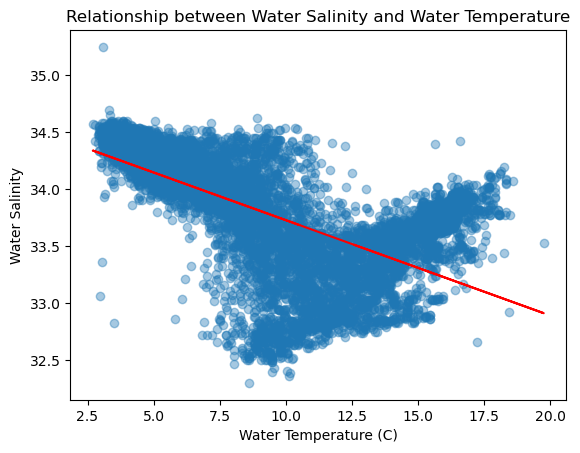

In [6]:
from sklearn.linear_model import LinearRegression

# Load dataset
ocean_df = pd.read_csv('ocean.csv', low_memory=False)

# Clean data by dropping rows with missing values for columns
ocean_df = ocean_df[["Salnty", "T_degC"]].iloc[:10000, :].astype(float)
ocean_df = ocean_df.dropna(subset=['Salnty', 'T_degC'])

# Fit model by using water temperatures as features and salinity as target
X = ocean_df['T_degC'].values.reshape(-1, 1)  # Features need to be 2D
y = ocean_df['Salnty'].values  # Target can be 1D

# Initialize Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Use model to predict salinity
y_pred = model.predict(X)

# Create scatter plot
plt.scatter(X, y, alpha=0.4)

# Plot regression line
plt.plot(X, y_pred, color='red')

# Title plot and add axis labels
plt.title('Relationship between Water Salinity and Water Temperature')
plt.xlabel('Water Temperature (C)')
plt.ylabel('Water Salinity')

# Display plot
plt.show()

## Task 3

How are *pH1* and *pH2* correlated? Measure the strength of correlation. Moreover, describe their correlation in a scatterplot.

The correlation coefficient between pH1 and pH2 is: 0.9959132715034444


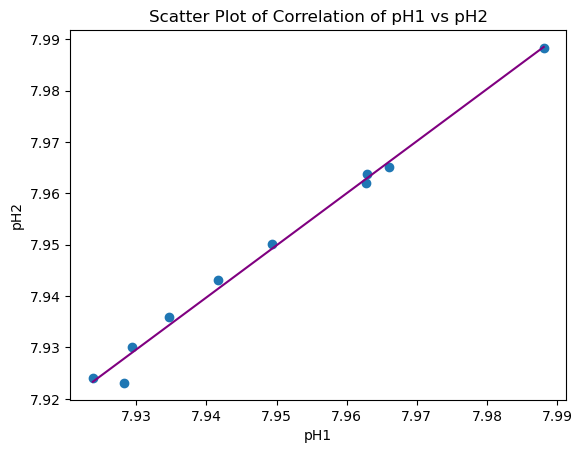

In [7]:
# Load dataset
ocean_df = pd.read_csv('ocean.csv', low_memory=False)

# Clean data by dropping rows with missing values for columns
ocean_df = ocean_df.dropna(subset=['pH1', 'pH2'])

# Calculate correlation coefficient
correlation = ocean_df['pH1'].corr(ocean_df['pH2'])
print(f"The correlation coefficient between pH1 and pH2 is: {correlation}")

# Assign X and y
X = ocean_df['pH1']
y = ocean_df['pH2']

# Create scatter plot
plt.scatter(X, y)

# Calculate best-fit line
coeff = np.polyfit(X, y, 1)
poly = np.poly1d(coeff)
x = np.linspace(X.min(), X.max())
y_corr = poly(x)

# Plot best-fit line
plt.plot(x, y_corr, color='purple')

# Title plot and add axis labels
plt.title('Scatter Plot of Correlation of pH1 vs pH2')
plt.xlabel('pH1')
plt.ylabel('pH2')

# Display plot
plt.show()